# COM4509/6509 Assignment 2024

Hello, this is the programming assignment for *Machine Learning and Adaptive Intelligence*. This is worth 50% of the module grade, the remaining 50% will be assessed via the formal exam.

**Deadline: 13th December 2024, 23:59**

Please submit well before the deadline as there may be delays in the submission. Submission will be via Blackboard.

There are 2 parts to this assignment, covering different portions of the course. Both parts are worth 50 marks to give a combined total of 100 marks. Both contain a set of questions which will ask you to implement various machine learning algorithms that are covered throughout the course. You will receive marks for the correctness of your implementations, text based responses to certain questions and the quality of your code. Each question indicates how many marks are available.

### Use of unfair means and Generative AI

For this assignment **you must not use code/text produced by generative AI, that is created using a prompt**. The 'autocomplete' feature in colab can still be used.

This is an individual assignment, while you may discuss this with your classmates, **please make sure you submit your own code**. You are allowed to use code from the labs as a basis of your submission.

The university's policy on the use of GenAI is on [this page](https://www.sheffield.ac.uk/study-skills/digital/generative-ai/assessment).

"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations." (from the students Handbook).

### Assignment help

If you are stuck and unsure what you need to do then please ask either in the lectures, labs or on the discussion board. There is a limit to what help we can provide but where possible we will give general guidance with how to proceed.

We are happy for you to discuss the assignment with other students but your code and test answers **must** be your own.

### What to submit

- You need to submit a **pdf** of your notebook *and* the **notebook**. Please name them:

```
assignment_[username].ipynb
assignment_[username].pdf
```
replacing `[username]` with your username, e.g. `abc18de`.

- **Please execute the cells before your submission**, so we can see the results in the pdf. The best way to get a pdf is using Jupyter Notebook locally but if you are using Google Colab and are unable to download it to use Jupyter then you can use the Google Colab *file $\rightarrow$ print* to get a pdf copy.
- **Please do not upload** the data files used in this Notebook. We just want the python notebook *and the pdf*.

### Late submissions

We follow the department's guidelines about late submissions, Undergraduate [handbook link](https://sites.google.com/sheffield.ac.uk/comughandbook/your-study/assessment/late-submission). PGT [handbook link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/home/your-study/assessment/late-submission).


# Part 1: Tracking Bees

### Overview
This part of the assignment will cover lectures:
 - 1, Introduction to Machine Learning
 - 2, parts of End-to-End ML
 - 4, Linear regression

### Allowed libraries
For this part we are looking for you to demonstrate what you have learned in this module - the libraries needed are already imported in the code below - you shouldn't need to import any other library.

### Marks

There are 50 marks available for this half of the coursework (45 in the nine questions below, and 5 for code quality and clarity). The marks for code quality does not cover the correctness of your answers to each section but rather the style and clarity of your code. You should aim to avoid repetition of code, have clear but concise comments and appropriately named variables.

You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

# Imports and Datafiles

In [6]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

urllib.request.urlretrieve('https://drive.usercontent.google.com/download?id=1XrXVkEfFtgA9VlU2rP4-gGdI_7-TmJ4k&export=download&authuser=0','bee_flightpaths.npy')
dataset = np.load('bee_flightpaths.npy',allow_pickle=True)

Nbases = 10 #number of bases per axis

# Part 1: Finding the path of the bee

In lectures, I briefly mentioned the problem of inferring the path of a bumblebee. For this half of the coursework you will be required to reconstruct the flight path of a series of bees!

The tracking system consists of four detectors in the landscape. Each one occasionally detects the bee and records its bearing (the direction the bee is in).

In the figure the detectors are marked as green circles, the true path of the bee is the red line. In this example the detectors record the direction of the bee at five times (0s, 0.9s, 1.8s, 2.7s, 3.6s). The blue lines indicate the bearing of the bee at each of those times.

![test](https://external-content.duckduckgo.com/iu/?u=https://drive.usercontent.google.com/download?id=1IIaTWlqDuUla6tmL2usinWcOs_aJknb7&export=download&authuser=0&confirm=t&uuid=ee31fadf-4593-468f-b759-6a418767006c&at=AENtkXYQ8DcCgp1c8l__xmzCyWQp:1730720770038)


*Flight path of the bee and the bearings from the detector from<br/>which it was observed -- notice we only get the bearing of the<br/>bee, we don't know how far away it is. Axes are in metres.*<br/><br/>

The task is to try to estimate the path of the bee, given those observations.

The dataset consists of 30 such flight paths (inside `dataset`). Each element e.g. `dataset[12]` is a flightpath dictionary containing:
 - `truepath`: An array of 100 points of the bee's flight over 30 seconds. This is an array $100 \times 3$. The first column is the time, the second and third the location (x,y) of the bee. For example:

```
 array([[  0.  , -43.11,  11.27],
       [  0.3 , -43.68,   9.49],
       [  0.61, -44.03,   7.69],
       [  0.91, -44.15,   5.88],
       [  1.21, -44.03,   4.07],
            :      :        :
```

 - `observations`: A $17 \times 5$ array of 17 observations. Each row consists of the time (column 0), the location of the detector (columns 1 and 2), and a unit vector facing in the direction of the bee (columns 3 and 4).

```
array([[  0.  , -15.  , -15.  ,  -0.73,   0.68],
       [  0.91,  15.  ,  15.  ,  -0.99,  -0.15],
       [  1.82, -15.  ,  15.  ,  -0.89,  -0.46],
       [  2.73,  15.  , -15.  ,  -0.98,   0.18],
       [  3.64, -15.  ,  15.  ,  -0.62,  -0.78],
       [  4.55,  15.  , -15.  ,  -1.  ,   0.02],
       [  5.45, -15.  , -15.  ,  -0.89,  -0.45],
           :     :       :         :       :
```

(as an example, the 2nd row is an observation at time 0.91s, from a detector at location [15,15], that saw the bee in the direction of [-0.99, -0.15]. One can see this is one of the observations in the figure above.

## Question 1: Plotting [3 marks]

First, plot the true flightpath of the bee in `dataset[1]`. Add a marker to the plot for the location at time zero.


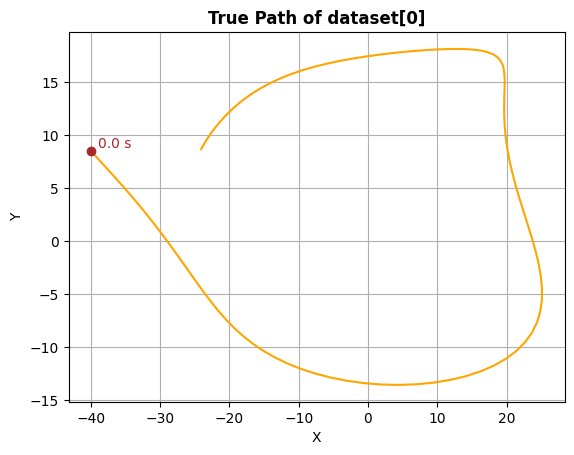

In [ ]:
#Answer here
x = dataset[1]['truepath'][:,1]
y = dataset[1]['truepath'][:,2]
# Line Plot
plt.plot(x,y, color='orange')
# Add a marker at time 0
plt.plot(x[0],y[0],'o', color='brown')
# Add text
plt.text(x[0]+1,y[0]+0.3,'0.0 s',color='brown')
# Configuration
plt.xlabel('X')
plt.ylabel('Y')
plt.title('True Path of dataset[0]', fontweight='bold')
plt.grid()
plt.show()

## Judging a prediction

Later we will make some predictions for the flight path of the bee: I.e. for a given time point we will predict the bee's location. Before we do that we first need a way of judging how good the prediction is: We need to write down an expression for how likely an observation was given that predicted location:

$p\Big(\text{observation at time}\;t\;\Big|\;\text{position at time}\;t\Big)$

If you think back to the lecture, this is the likelihood and the '$\text{position at time}\;t$' is our model's prediction.

To be more specific we need a function that gives us the **negative log likelihood**: The negative log probability of an observation given the bee is in a particular location.

Let's think about what this means.

- We are given (a prediction for) the location of the bee, e.g. `p = np.array([9.2, 10.1])`.
- We are also given a row of our observation array, e.g. `obs = np.array([23, 5, 5, 0.707, 0.707])`.

We want to write an expression that basically tells us how bad this fit is.

Let's plot these to help us understand the task:

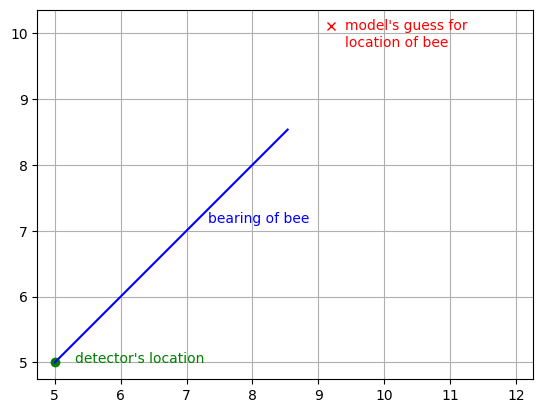

In [ ]:
p = np.array([9.2, 10.1])
ob = np.array([23, 5, 5, 0.707, 0.707])
plt.plot(p[0],p[1],'xr')
plt.text(p[0]+0.2,p[1]-0.3,'model\'s guess for\nlocation of bee',color='red')
plt.plot(ob[1],ob[2],'og')
plt.text(ob[1]+0.3,ob[2],'detector\'s location',color='green')
plt.plot([ob[1],ob[1]+5*ob[3]],[ob[2],ob[2]+5*ob[4]],'b-')
plt.text(ob[1]+3.3*ob[3],ob[2]+3*ob[4],'bearing of bee',color='blue')
plt.axis('equal')
plt.xlim([4,13])
plt.grid()

we can see that the observation is fairly consistent with the model's prediction, but isn't perfect. The predicted bee location is a little to the left of the observed direction.

## Question 2: Developing the function for the negative log likelihood [2 marks]

We need a way of assigning a probability to this observation given the prediction location.

To this end, the negative log likelihood function will:

1. Compute a unit vector, `u`, pointing in the direction of the predicted location of the bee relative to the detector. Remember for one of the observations `ob[1:3]` contains the location of the detector. We define another variable `p`, that contains the bee's predicted location. Think about how you might code this.
2. Note that we now have two unit vectors. `ob[3:5]` pointing in the observed direction of the bee, and `u`, pointed in the direction of the predicted location. *The difference between these two vectors tells us how good the prediction is*. We therefore need to compute the difference between these two vectors: Subtract one from another, and then we will find the length, $l$, of the resulting vector. If this vector is shorter it means we have a better match between the model prediction and the observation.
3.  We will assume our observations are corrupted by some independent Gaussian noise. I.e. the $l$ of this 'error vector' is from a Gaussian distribution, with mean zero, and some noise variance $\sigma^2$. So the probability of $l$ (ignoring constant factors) is,

$$p(l) \sim N(l|0,\sigma^2) \propto \text{exp}\left(\frac{-l^2}{2\sigma^2}\right)$$

We need to compute the negative log probability.

Question 2: Write down the negative log probability (ignoring constant terms), i.e.
$$-\log_e \big(p(l) \big)$$

(hint: try substituting in the expression for $p(l)$ into this expression)

**[answer here]**

**Step 1:** Compute a unit vector from predicted location and detector location
$$ u = \frac{\vec{Prediction} - \vec{Detector}}{||\vec{Prediction} - \vec{Detector}||} = \frac{(X_p - X_d)\vec{i} + (Y_p - Y_d)\vec{j}}{\sqrt{(X_p - X_d)^2 + (Y_p - Y_d)^2 }}$$
**Step 2:** Find the length $l$ from the unit vector and bearing vector
$$ \vec{l} = \vec{u} - \vec{b}$$
$$ l = \sqrt{(X_u - X_b)^2 + (Y_u - Y_b)^2 }$$
<u>In Matrix Form:</u>

$$ l = (\mathbf{(\mathbf{u} - \mathbf{b})^T} \times \mathbf{(\mathbf{u} - \mathbf{b}))^{\frac{1}{2}}} $$

**Step 3:** Calculate the negative log likelihood
$$ -\log_e \big(p(l) \big) = -\log_e \big({exp}\left(\frac{-l^2}{2\sigma^2}\right)\big) $$
$$ -\log_e \big(p(l) \big) = -\big(\frac{-l^2}{2\sigma^2}\big) $$
$$ -\log_e \big(p(l) \big) = \frac{l^2}{2\sigma^2} $$
<u>In Matrix Form:</u>

$$ -\log_e \big(p(l) \big) = \frac{\mathbf{L^T} \times \mathbf{L}}{2\sigma^2} $$


(Side Note: It is important that the likelihood function integrates to one (or at least a fixed constant) over the domain of possible observations. This is difficult to quantify exactly in many cases. We won't worry about it for this coursework).


## Question 3: Coding the negative log likelihood [4 marks]

We now need to implement the above steps. Complete the method below.

(Hint: For each of the steps 1-3, you will need to write one or two lines inside this method).

Please use the expression you devised above for the **unnormalised** negative log probability.

In [ ]:
def negloglikelihood(ob,p,noise_scale=0.1):
  """Computes the negative log likelihood for ONE observation
    and ONE model's position prediction.

    Parameters
    ----------
    ob : (5,) array_like
        A 1d array describing an observation. Contains:
          [time,detectorx,detectory,bearingx,bearingy]
    p : (2,) array_like
        A 1d array describing a model's position prediction. Contains:
          [x,y]
    noise_scale : float, optional
        The standard deviation (\sigma) of the Gaussian noise distribution over the
        length of the vector between the unit vector pointing at the observed
        bee and the unit vector pointing at the predicted bee location.

    Returns
    -------
    float
        The negative log probability of the observation given the
        model's prediction, i.e.

                     --log p(ob|p)
    """
  # Define a function to calculate the magnitude of a vector
  def calculate_magnitude(x, y):
    return np.sqrt(x**2 + y**2)
  # Step 1: Calculate the unit vector from predicted location and detector location
  X_p , X_d , Y_p , Y_d = p[0], ob[1], p[1], ob[2]
  u_magnitude = calculate_magnitude(X_p - X_d, Y_p - Y_d)
  u = np.array([(X_p - X_d) / u_magnitude, (Y_p - Y_d) / u_magnitude])
  # Step 2: Calculate the length of the vector from unit vector and bearings
  l = u - ob[3:5]
  # Step 3: Return the negative log likelihood
  return (l.T @ l) / (2 * noise_scale**2)


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tx/6718jl_937qg03h108680hc00000gn/T/ipykernel_14915/3804457275.py:2: SyntaxWarning: invalid escape sequence '\s'
  """Computes the negative log likelihood for ONE observation


## Question 4: Check your solution [3 marks]

You should check your method is correct! As a simple check, let's consider a prediction that the bee is at position [50,30], and was detected by a detector
as [10,0], in unit vector direction [1,0].

Question 4: **Compute by hand:**

- the unit vector facing in the predicted direction of the bee from the detector
- the difference "error vector" between this vector and the unit vector pointing in the observed direction.
- the squared length of this "error vector".
- use this to compute the **unnormalised** negative log likelihood, with value of $\sigma=0.1$.

The answer should be 20.

You have two tasks,

- Q4a) Compute this by hand as described to check your answer.
- Q4b) Test that your `negloglikelihood` method also computed it as 20, by passing it the appropriate parameters.

*Hint 1: The most tricky bit will be writing the 5 elements in for the observation array, remember it needs to be of the form `np.array([time,detectorx,detectory,bearingx,bearingy])`. The 'time' element doesn't affect the result, so just put anything in for time.*

*Hint 2: You might get an error like `UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'`, this will happen if you build your array with integers and later try to overwrite one with a float. Numpy might have an issue with entering floats into an integer array. The easiest fix is to replace e.g. `10` with `10.0` when creating the array.*

**[Answer here]**

```
4a) Write down the calculation you have done by hand, step by step, here.
```

**Given by the question:**

Predicted Location: $ X_p = 50 $, $ Y_p = 30 $

Detector Location: $ X_d = 10 $, $ Y_d = 0 $

Bearing Vector: $ X_b = 1 $, $ Y_b = 0 $

$\sigma=0.1$

**Step 1:** Compute a unit vector from predicted location and detector location
$$ u = \frac{(X_p - X_d)\vec{i} + (Y_p - Y_d)\vec{j}}{\sqrt{(X_p - X_d)^2 + (Y_p - Y_d)^2 }} $$
$$ u = \frac{(50 - 10)\vec{i} + (30 - 0)\vec{j}}{\sqrt{(50 - 10)^2 + (30 - 0)^2 }} $$
$$ u = \frac{40\vec{i} + 30\vec{j}}{50} $$
$$ u = 0.8\vec{i} + 0.6\vec{j} $$
**Step 2:** Find the length $l$ from the unit vector and bearing vector
$$ l = \sqrt{(X_u - X_b)^2 + (Y_u - Y_b)^2 } $$
$$ l = \sqrt{(0.8 - 1)^2 + (0.6 - 0)^2 } $$
$$ l \approx 0.63245 $$
**Step 3:** Calculate the negative log likelihood
$$ -\log_e \big(p(l) \big) = \frac{l^2}{2\sigma^2} $$
$$ -\log_e \big(p(l) \big) = \frac{0.63245^2}{2(0.1)^2} $$
$$ -\log_e \big(p(l) \big) \approx 20 $$

In [ ]:
#Q4b) Check for the above example negloglikelihood returns about 20.
# You need to write something like, negloglikelihood(5_element_observation_array_here,2_element_predicted_location_array_here)
# Hint: It might not give exactly 20, but 19.99999 would be fine!
#[answer here]
ob = np.array([0, 10.0, 0, 1.0, 0])
p = np.array([50.0, 30.0])
negloglikelihood(ob, p)

19.999999999999993

## Linear regression

To make our predictions we need to predict the $x$ coordinate and the $y$ coordinate of the bee over time.

To do this we will use linear regression (but note that our likelihood function is not going to be amenable to a closed form solution).

We will use a Gaussian basis, and predict the location along each axis separately -- i.e. one regression problem will be 'what is x at time t?' and the other is 'what is y at time t?'

## Question 5: Prediction function [4 marks]

For our linear regression prediction we have a set of B=10 Gaussian bases centred at times $c_b = -3, 1, 5, 9,...,25, 29, 33$, each with a width hyperparameter of $\alpha=3$. We have a set of parameters, $\textbf{w}$, that we will later need to fit. The prediction at a time $t$ will equal:

$$ \sum_{b=1}^B w_b \;\text{exp}\Big(-\frac{(t-c_b)^2}{2 \alpha^2}\Big)$$

Write a function that takes a list of N times, e.g. `T = [1,2,3.5,4.5,6]` and a list of B parameters, e.g. `w = [1.2, -3.1, 4.5]` and returns the N predictions associated with those times.

*Hint: You could use `basis_centres = np.arange(-3,34,4)` to get a numpy array of the locations of the basis centres.*

In [ ]:
def getpred(T,w,width=3):
  """Computes a prediction using linear regression and 10 Gaussian bases, each
     is centred at -3,1,5,9...25,29,33 seconds. They have a width specified by
     the `width` parameter.

    Parameters
    ----------
    T : (N,) array_like
        A 1d array of times (in seconds) to make the predictions.
    w : (16,) array_like
        A 1d array of the 16 parameters (the weights that each basis function
           is scaled by.
    width : float, optional
        The width of each Gaussian basis function (default = 3 seconds).

    Returns
    -------
    (N,) array_like
        The prediction for each time point in T, i.e.

                     sum_b w_b exp(-(t-c_b)^2/(alpha^2))

        where each c_b is the time at the centre of each basis.
    """
  # Answer here
  basis_centres = np.arange(-3,34,4)
  # Gaussian Formula
  X = np.exp(-0.5 * ((T.reshape(-1,1) - basis_centres)**2 / width**2))
  return X @ w

### Test your prediction function...

Here's a couple of tests to let you check if your code is correct.

In [ ]:
#We use 'assert' to check that your method produces the right answers...

# if we pick a time exactly on the centre of a basis, with all the other bases
# equal to zero we should get that value...
testw = np.zeros(10)
testw[4] = 3.0 #this is for the basis at t=13
assert getpred(np.array([13]),testw)[0]==3.0

#if we take a point between two of our bases, each basis will contribute
#np.exp(-2**2/(2*3**2)) to the points value, so if we set all the other bases
#to zero, we would expect the point to equal:
#    np.exp(-2**2/(2*3**2))*(sum_of_the_two_bases)
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([15]),testw)[0] #15 is mid point
assert np.abs(np.exp(-2**2/(2*3**2))*(4+6)-prediction)<0.01

#test again with a change in the width of the gaussians.
testw = np.zeros(10)
testw[4] = 4.0 #basis at t=13
testw[5] = 6.0 #basis at t=17
prediction = getpred(np.array([0,15]),testw,width=4) #15 is mid point
assert np.abs(np.exp(-2**2/(2*4**2))*(4+6)-prediction[1])<0.01
assert np.abs(0.02-prediction[0])<0.01 #this is far from these basis fns so should be about zero.

We can produce a 2d array of prediction locations by doing two lots of regression to predict the x coordinate and to predict the y coordinate.

Here we use some random values for the 20 parameters (10 for each coordinate axis).

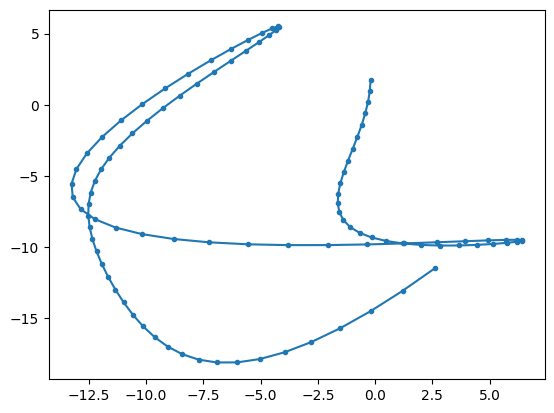

In [ ]:
np.random.seed(1)
pred_t = np.linspace(0,30,100) #times to predict for... (100 points from 0s to 30s)

#we use Nbases*2 (=20) parameters (10 for the x-axis regression, 10 for the y-axis regression)
example_w = 10*np.random.randn(Nbases*2) #randomly sample some parameters.

x_predictions = getpred(pred_t,example_w[:Nbases]) #uses first 10 parameters in 'example_w' to predict x location over time
y_predictions = getpred(pred_t,example_w[Nbases:]) #uses last 10 parameters in 'example_w' to predict y location over time

#concantenate the two vectors into an array of Nx2 coordinates.
predpath = np.array([x_predictions,y_predictions]).T

#plot this path
plt.plot(predpath[:,0],predpath[:,1],'.-')

Note, rather than write out `dataset[1]['observations']` we save it in `obs` for convenience.

In the next step, we will want to try to fit our observations. To do this **we will first need to compute the predicted location at each of the times we observed the bee**. Those times are in the first column of `obs`, i.e.: `obs[:,0]`; the 'time' column in the observation vector.

In [ ]:
obs = dataset[1]['observations']
truepath = dataset[1]['truepath']

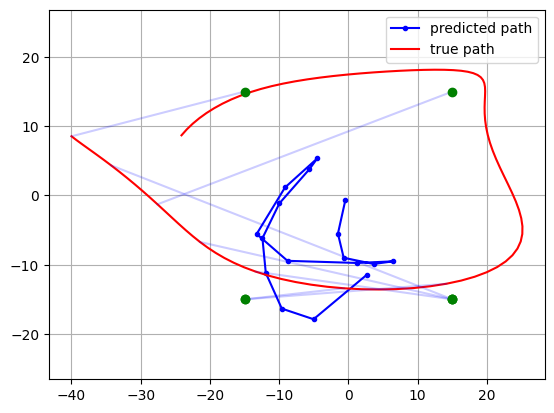

In [ ]:
np.random.seed(1)

example_w = 10*np.random.randn(Nbases*2) #again, we'll use random parameter values

#!!!!!!!hint the next line might be useful later...!!!!!!!#
#we predict the path for the times we made observations...
#predpath is an Nx2 array of predicted locations (each row is the x,y coordinate
#at the times in obs[:,0]).
predpath = np.array([getpred(obs[:,0],example_w[:Nbases]),getpred(obs[:,0],example_w[Nbases:])]).T

plt.plot(predpath[:,0],predpath[:,1],'.-b',label='predicted path')
plt.plot(truepath[:,1],truepath[:,2],'-r',label='true path')

#just plot first 7 observation vectors to illustrate...
for ob in obs[:7]:
  r = np.sqrt(np.sum((truepath[np.argmin(np.abs(truepath[:,0]-ob[0])),1:3]-ob[1:3])**2))

  plt.plot([ob[1],ob[1]+ob[3]*r],[ob[2],ob[2]+ob[4]*r],'b-',alpha=0.2)
  plt.plot(ob[1],ob[2],'og')
plt.axis('equal')
plt.grid()
plt.legend()

This is obviously a poor fit at the moment as we used random values for our parameters. Let's look at how we can improve them.

I've also plotted the locations of the detectors and the first 7 observations, projected to the points on the true path where the bee was. Remember the observations only have the bearing (direction) of the bee, not the distance, so to estimate the path we need to combine the observations from the different detectors.

## Question 6: Total Negative Log Likelihood [4 marks]

For a given parameter vector, `w`, and observation array `obs` what is the TOTAL negative log likelihood (over all the observations in `obs`).

We will assume that the Gaussian noise in our model is independent between observations.

Your task:

- You need to find the negative log likelihood for each observation by calling `negloglikelihood` with parameters:

   - each row of `obs`
   - the associated predicted location at the time of the observation.
   - the `noise_scale` hyperparameter parameter.

- Add these negative log likelihoods together.

- Add an L2 regularisation penalty term to the negative log likelihood.

In summary, for each observation, `ob` (one row of `obs`), you need to know the predicted location `p` (see hint in the previous code block how to get the predicted path for each observation time - you could take each row from this path as a predicted location, `p`). Using this you need to compute `negloglikelihood(ob,p,noise_scale)`. Finally you need to add to this the L2 regularisation term. Remember to compute the L2 regularisation you need to find the sum of the squares of the values in `w`. This sum needs to be multiplied by the `reg` parameter. See the regularisation term at end of this expression.

$$\sum_{i=1}^N \text{NLL}(\text{ob}_i|p_i,\sigma^2) + \lambda \sum_{b=1}^B w_b^2$$

$\lambda$ is the `reg` parameter that controls how much regularisation to do.

*__Side Note__: Regularisation is the equivalent of putting a prior on our model, and we are therefore really optimising the posterior, and thus this is Maximum a posteriori (MAP) estimation rather than maximum likelihood. You need not worry about this distinction for this coursework!*

*__Hint__: The expression above for `predpath` will be useful here...!*

<br/>

Question 6: Code the `totalnegloglikelihood` method:

In [ ]:
def totalnegloglikelihood(w,obs,reg=0.001,noise_scale=0.1):
  """
  Computes the total negative log likelihood for the given weight, using the observations
  in `obs` and with the hyperparameters reg (regularisation) and noise_scale.

  Parameters
  ----------
  w : (32,) array_like
      A 1d array of the 32 parameters (the weights that each basis function
      is scaled by.

  obs : (N, 5) array_like
      A 2d array of the N observations. Each row of this array contains:
        [time,detectorx,detectory,bearingx,bearingy]

  reg : float, optional
      The regularisation parameter (\lambda in the equation above).

  noise_scale : float, optional
      The standard deviation (\sigma) of the Gaussian noise distribution.
  Returns
  -------
  float :
      The total negative log likelihood for the given parameters, summed over
      all the observations in obs; plus the L2 regularisation term (scaled by `reg`).
  """

  #Answer here
  sum_NLL = 0
  p = np.array([getpred(obs[:,0],w[:Nbases]),getpred(obs[:,0],w[Nbases:])]).T
  # Loop through all the rows in obs
  for i in range(obs.shape[0]):
      sum_NLL += negloglikelihood(ob=obs[i,:],p=p[i,:],noise_scale=noise_scale)

  return sum_NLL + reg*(w.T @ w)

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
/var/folders/tx/6718jl_937qg03h108680hc00000gn/T/ipykernel_14915/24945376.py:2: SyntaxWarning: invalid escape sequence '\l'
  """


## Testing the total negative log likelihood code

This section lets you check your implementation produces the right answers.

In [ ]:
#again, using asserts to check you have the right answers...

#I reproduce an earlier test.
#a detector at position [10,0], observes bee in direction [1,0] at time 1
#and again, in the same place at time 17.
obs = np.array([[1,10,0,1,0],[17,10,0,1,0]])

#for testing we set all parameters to zero, except two, this should place
#the predicted bee (at time zero) at [50,30]...
testw = np.zeros(20)
testw[1] = 50.0
testw[11] = 30.0
testw[5] = 50.0
testw[15] = 30.0

#we computed the likelihood earlier for each of these observations should be
#about 20. With the regularisation (0.001*(50^2+30^2)) they should each be 23.4.
#So their sum should be about 46.8.
assert np.abs(totalnegloglikelihood(testw,obs,reg=0.001)-46.8)<0.001

## Optimising the parameters

Ideally we would used an auto-diff framework (we will next) but for now we can optimise the parameters using scipy...

Using the `minimize` method we find the vector of parameters that minimises the total negative log likelihood.

In [ ]:
from scipy.optimize import minimize

#start with random location
ws0 = np.random.randn(Nbases*2)

#we'll use dataset[1]'s observations..
obs = dataset[1]['observations']

res = minimize(totalnegloglikelihood,ws0,args=(obs,0.1,0.001))
print(res.x)

[-12.99230888 -22.35148312 -12.48110989  -7.25505875  26.01719411
   2.87514861  17.62961954  -1.56232737 -16.83841005  -4.30196608
  17.74033259   0.27422896  -1.4229104  -10.59187223  -5.97682304
   5.67568886  11.41603998   9.08359384   7.45168987   3.2994274 ]


## Question 7: Plotting the results [4 marks]

Predict the path for 100 evenly spaced time points between 0 to 30, and plot the predicted path. On the same graph plot the true path, available in `dataset[1]['truepath']`.

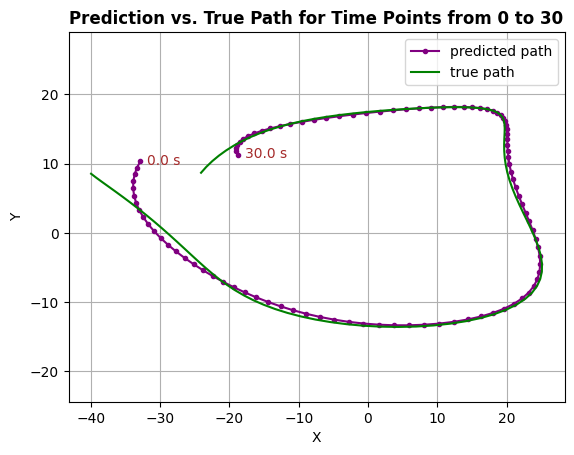

In [ ]:
#Answer here
np.random.seed(1)

t = np.linspace(0,30,100)
truepath = dataset[1]['truepath']

# Predict the path
predpath = np.array([getpred(t,res.x[:Nbases]),getpred(t,res.x[Nbases:])]).T

# Plot
plt.plot(predpath[:,0],predpath[:,1],'.-', color='purple',label='predicted path')
plt.plot(truepath[:,1],truepath[:,2],'-g',label='true path')

# Add Annotations for t=0 and t=30
plt.text(predpath[0,0]+1,predpath[0,1]-0.5,'0.0 s',color='brown')
plt.text(predpath[-1,0]+1,predpath[-1,1]-0.5,'30.0 s',color='brown')

plt.title('Prediction vs. True Path for Time Points from 0 to 30', fontweight='bold')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()

## Question 8: Optimising the hyperparameters [6 marks]

- Do a grid search over the regularisation and the noise_scale hyperparameters.
- Select appropriate ranges (consider if linear or log ranges would be best).
- For each configuration of hyperparameters,
  - Loop over the first five datasets in `dataset`.
  - Optimise the parameters for each dataset.
  - We will be comparing the predictions with the values in `dataset[i]['truepath']`. The first column contains the time, so you will need to call `getpred` with `dataset[i]['truepath'][:,0]` as the times to get predictions for. The last two columns are the x, y coordinates.
  - Compute the sum squared error of all these predictions (i.e. simply find the sum squared difference between the predicted locations values and the true path, something like: `np.sum((ds['truepath'][:,1:]-preds)**2)`
  - Record the sum squared error for each configuration of hyperparameters.
- Report the hyperparamters that minimise this sum squared error.

In [ ]:
# Answer here
np.random.seed(1)
w = np.random.randn(Nbases*2)
count = 1
error = []
result = {}
best_params = {}

def sum_square_error(true_val, pred_val):
    return np.sum((true_val - pred_val)**2)

for reg in np.logspace(-5,-1,5):
    for ns in np.logspace(-3,1,5):
        for i in range(5):
            # Weight Optimization
            optimizer = minimize(totalnegloglikelihood,w,args=(dataset[i]['observations'],reg,ns))
            w = optimizer.x
            # Predict the path
            preds = np.array([getpred(dataset[i]['truepath'][:,0], w[:Nbases]), getpred(dataset[i]['truepath'][:,0], w[Nbases:])]).T
            # Append the SSE from each dataset
            error.append(sum_square_error(dataset[i]['truepath'][:,1:],preds))
        # Store the mean of Errors from each hyperparameter
        result[f'{reg}|{ns}'] = np.mean(error)
        # Reset the error list
        error = []

# Find the best hyperparameters
best_params['regularisation'] = min(result, key=result.get).split('|')[0]
best_params['noise_scale'] = min(result, key=result.get).split('|')[1]
best_score = min(result.values())
# Report the result
print(f'Best Parameters = {best_params}')
print(f'Best Score = {best_score}')


Best Parameters = {'regularisation': '0.0001', 'noise_scale': '0.1'}
Best Score = 341.1881276890098


## Estimating uncertainty

We can estimate the uncertainty in our predictions. As the details of this approach are beyond the module, I've just put some information about how this is done at the end of this notebook for those who are interested. So for this question we just look at the result of the calculation.

Here are the set of samples using the Laplace approximation for `dataset[5]`.

![test](https://external-content.duckduckgo.com/iu/?u=https://drive.usercontent.google.com/download?id=1mvIwUBngNcIfKB3GmeLMITJg27D29Duh&export=download&authuser=0&confirm=t&uuid=e6be019a-6c83-4a92-a372-de9e73e1d627&at=AENtkXYw0QVYJdK2EInNTgiB6xa1:1730842927336)

The black line shows the maximum a posteriori estimate, the grey lines are samples from the approximation to the posterior distribution of the parameters. The true path is in red. The blue lines indicate the observations made by our detectors.

To understand this a little more clearly, we can plot the distribution of predicted locations at a single time point (t=1.8s):

![test](https://external-content.duckduckgo.com/iu/?u=https://drive.usercontent.google.com/download?id=1abkQjHUrhmGwZ1AbZ0EbA8i98MjRA9Eh&export=download&authuser=0&confirm=t&uuid=e209d1d2-872f-4dbb-941a-ff1f7396271e&at=AENtkXbw7uKK2_c_2ExpdJsPpINe:1730842976324)

The black cross (+) is the maximum a posteriori estimate, the scattered black points are samples from the posterior to illustrate the distribution. The true location is marked by the red disk, the first three observations (by coincidence all associated with the same detector) are plotted.

## Question 9: Explaining and Interpreting [14 marks]

- Q9a) Look at the above graph: Considering the early observations, explain why the posterior distribution of predicted locations at $t=1.8s$ has the distribution indicated? [3 marks]

- Q9b) Why does the predicted path at the start and end of the time series curl back into the centre of the plot? [3 marks]

- Q9c) Why are we evaluating the performance on `dataset[5]` and not one of the datasets used during optimising the hyperparameters? [1 mark]

- Q9d) Why was a Gaussian basis a good choice for this problem? [2 marks]

- Q9e) If the detectors had 'false positive' erroneous detections, the observations would contain outliers. Propose a change that could help address these outliers in the data. [2 marks]

- Q9f) What other hyperparamters could have been optimised? [1 mark]

- Q9g) If the width of the Gaussian bases was 30s instead of 3s, what effect would that have on the type of path that could be predicted? [2 marks]

**[Answer here]**

Q9a) They are distributed by a various reasons:
- **Limited number of detectors:** With only four detectors, there is a limited geographical area where the bee’s location can be effectively tracked. If the detectors are concentrated in specific regions, there could be blind spots or areas where data is sparse, leading to lower confidence in the predicted location at $t=1.8s$
- **Measurement Noise:** it can be a significant problem when dealing with sensors or detectors, especially if they are sensitive to environmental factors or prone to small errors. 

Q9b) This is due to the distribution of the detectors. Since all detectors are positioned between -20 and 20 on the x-axis, contributing to predictions for positions less than -20 and greater than 20 on the x-axis tend to curve toward the center.

Q9c) It is the same reason why we use the ```train_test_split``` function from sklearn to ensures that we are not "cheating" by testing the model on data it has already seen, allowing for a more accurate measure of the model's generalization ability to new data.

Q9d) Gaussian basis is a good choice because of its model's nature. Since the movement of bees likely follows some continuous path, and the Gaussian distribution can naturally model this uncertainty. It gives a smooth distribution that can represent the probability of the bee being at a certain location, without introducing sharp discontinuities or unrealistic jumps.

Q9e) The simplest yet effective approach to address outliers caused by false positive detections is **Outlier Rejection using a Threshold**. As following steps:
- Calculate the residuals (the differences between the predicted location and the observed locations) after collecting observations from the detectors
- Set a threshold for how large a residual can be before it is considered an **outlier**.
- Discard or given very low weight for the observations that larger than threshold.

This method is easy to implement and can effectively reduce the impact of erroneous detections on the predictions.

Q9f) NBases & Width ($α$)

Q9g) Increasing the width of the Gaussian bases to 30 seconds will result in a more generalized, less detailed path with greater uncertainty and less sensitivity to the bee's immediate, fast movements. This could be appropriate if the bee's movement is relatively smooth and predictable, but it may be less accurate in capturing fine details in more dynamic or rapid movement scenarios.

<hr>

# Part 2: Neural networks, Dimensionality reduction and Clustering

This is the *second* of the two parts, accounting for the other 50 marks of the overall coursework mark.
Attempt as much of this as you can, each of the questions are self-contained and contain some easier and harder bits so even if you can't complete Question 1 straight away then you may still be able to progress with the other questions.

## Overview
This part of the assignment will cover:
- Q1: Classification and neural networks (lectures 5 and 6)
- Q2: Dimensionality reduction and clustering (lectures 7 and 8)

### Allowed libraries
For this part we are looking for you to demonstrate what you have learned in this module and so we will be restricting what libraries you can use to
- Numpy and Scipy
- Matplotlib
- PyTorch
- Scikit-Learn (for simple models)

### Assessment Criteria

- The marks for this part are distributed as follows:
    - **Q1**: 28 marks
    - **Q2**: 17 marks
    - **Code quality**: 5 marks
        - Marks for code quality does not cover the correctness of your answers to each section but rather the style and clarity of your code. You should aim to avoid repetition of code, have clear but concise comments and appropriately named variables.
- You'll get marks for correct code that does what is asked and for text based answers to particular points. We are not overly concerned with model performance but you should still aim to get the best results you can for your chosen approaches. You should make sure any figures are plotted properly with axis labels and figure legends.

If you are unsure about how to proceed then please ask during the lectures/labs or on the discussion board.



## Question 1: Classification and neural networks [28 marks]

This first question will look at implementing classifier models via supervised learning to correctly classify images.

We will be using images from the MedMNIST dataset which contains a range of health related image datasets that have been designed to be similar to the original digits MNIST dataset. Specifically we will be working with the OrganAMNIST part of the dataset. The code below will download the dataset for you and load the numpy data file. The data file will be loaded as a dictionary that contains both the images and labels already split to into training, validation and test sets. The each sample is a 28 by 28 greyscale image and are not necessarily normalised. You will need to consider any pre-processing.

Your task in this questions is to train **at least 4** different classifier architectures (e.g logistic regression, fully-connected network, convolutional network etc) on this dataset and compare their performance. These can be any of the classifier models introduced in class or any reasonable model from elsewhere. You should consider 4 architectures that are a of suitable variety i.e simply changing the activation function would score lower marks than trying different layer combinations.

This question will be broken into the following parts:
1) A text description of the model architectures that you have selected and a justification of why you have chosen them. Marks will be awarded for suitability, variety and quality of the architectures.
2) The training of the models and the optimisation of any hyper-parameters.
3) A plot comparing the training and test accuracy of the different architectures with a short discussion your results.

### About the dataset

For this question, you will be working with the OrganA-MNIST dataset. This is a benchmark dataset compiled using real CT scans of patients. The images have been localised and cropped to a 28 x 28 pixel image to replicate the original digits MNIST format. You can find out more information about the MedMNIST [here](https://arxiv.org/pdf/2110.14795). The code below will download the data for you, load the initial data dictionary and plot the 11 classes to visualise what the data is like. For OrganA-MNIST, it contains images of various organs: Left Lung, Right Lung, Heart, Liver, Spleen, Pancreas, Left Kidney, Right Kidney, Bladder, Left Fermoral Head, Right Femoral Head. However, there is no clear documentation relating the numerical class ids to these names. We will work only with the numerical labels but please be aware of this.

In [68]:
import numpy as np
import urllib.request
import os

datafile = 'organamnist'

# Download the dataset to the local folder
if not os.path.isfile(f'./{datafile}.npz'):
    urllib.request.urlretrieve(f'https://zenodo.org/records/10519652/files/{datafile}.npz?download=1', f'{datafile}.npz')

# Load the compressed numpy array file
dataset = np.load(f'./{datafile}.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(f'dict key: {key:12s}, array shape: {dataset[key].shape}, array datatpye: {dataset[key].dtype}')

dict key: train_images, array shape: (34561, 28, 28), array datatpye: uint8
dict key: train_labels, array shape: (34561, 1), array datatpye: uint8
dict key: val_images  , array shape: (6491, 28, 28), array datatpye: uint8
dict key: val_labels  , array shape: (6491, 1), array datatpye: uint8
dict key: test_images , array shape: (17778, 28, 28), array datatpye: uint8
dict key: test_labels , array shape: (17778, 1), array datatpye: uint8


This dataset contains 11 classes.


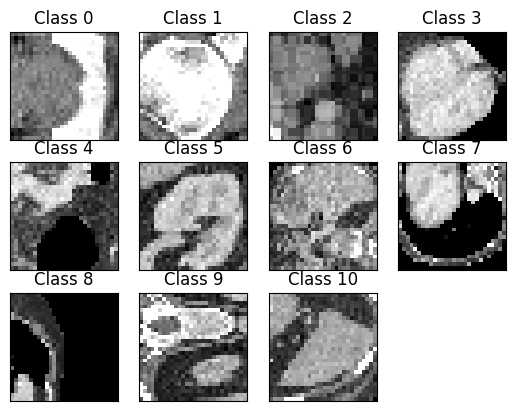

In [69]:
import matplotlib.pyplot as plt

class_ids, class_first_occur = np.unique(dataset['train_labels'], return_index=True)

print(f'This dataset contains {len(class_ids)} classes.')


Nrows = 3; Ncols = 4
fig, ax = plt.subplots( Nrows, Ncols, sharex=True, sharey=True)

for i in range(Nrows):
    for j in range(Ncols):
        if( i*Ncols + j < len(class_ids)):
            idx = class_first_occur[i*Ncols + j]
            label = dataset['train_labels'][idx,0]
            ax[i,j].set_title(f'Class {label}')
            ax[i,j].set_yticks([])
            ax[i,j].set_xticks([])
            ax[i,j].imshow(dataset['train_images'][idx], cmap='gray')
        else:
            ax[i,j].axis('off')
plt.show()


### 1.1: Initial analysis: clustering and dimensionality reduction [5 marks]

The first step of this question will be analyse the data using clustering and dimensionality reduction. In the following blocks you should:
1) Apply a **clustering algorithm** of your choice on the training data (using all 784 pixels as features unless there is a good reason to reduce first). Aim to split the data into 11 clusters.
2) After you have clustered the data, use a **dimensionality reduction algorithm** (e.g pca) to reduce the images to 3 dimensions.
3) Use these reduced dimensions to **create two 3d plots of the test images** with a) the points coloured using the true labels and b) the points coloured using the cluster labels. An example of a 3d plot is given below.
4) Provide a **short comment** on what observe from your clustered data.

For this sub-question you may use scikit-learn.

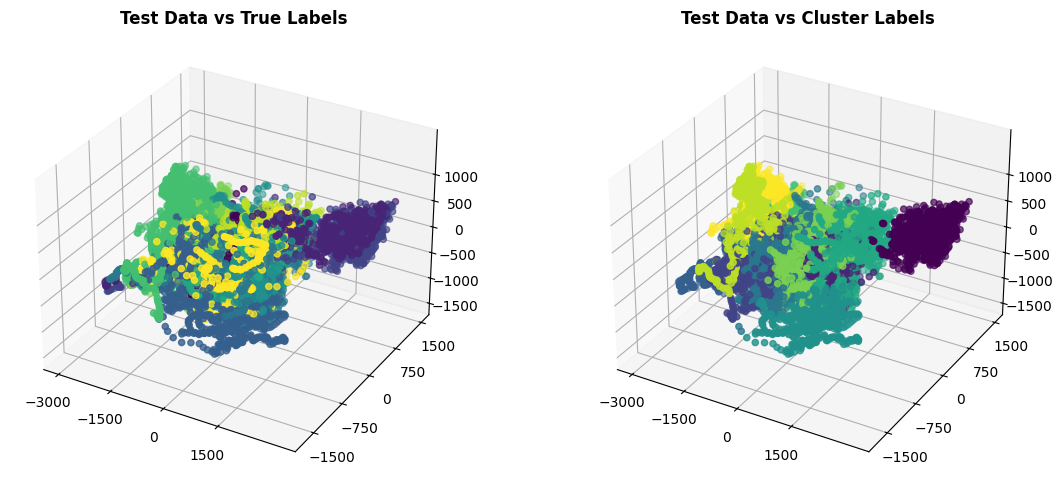

In [70]:
# Write your clustering and dimensionality reduction algorithms here.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Clustering
n_clusters = 11
train = dataset['train_images'].reshape(-1, 784)
test = dataset['test_images'].reshape(-1, 784)
kmeans = KMeans(n_clusters=n_clusters, random_state=79, n_init='auto').fit(train)
clustered_data = kmeans.predict(test)

# 2. Dimensionality Reduction
pca = PCA(n_components=3).fit(train)
test_pca = pca.transform(test)

# 3. 3D Plot the Result
fig, axes = plt.subplots(1, 2, figsize=(12, 5), subplot_kw=dict(projection = '3d'))

axes[0].set_title('Test Data vs True Labels', fontweight='bold')
axes[0].scatter(test_pca[:, 0], test_pca[:, 1],test_pca[:, 2], c=dataset['test_labels'])
xticks, yticks, zticks = np.arange(-3000, 3000, 1500), np.arange(-1500, 2000, 750), np.arange(-1500, 1500, 500)
axes[0].set_xticks(xticks, minor=False)
axes[0].set_yticks(yticks, minor=False)
axes[0].set_zticks(zticks, minor=False)

axes[1].set_title('Test Data vs Cluster Labels', fontweight='bold')
axes[1].scatter(test_pca[:, 0], test_pca[:, 1],test_pca[:, 2], c=clustered_data)
axes[1].set_xticks(xticks, minor=False)
axes[1].set_yticks(yticks, minor=False)
axes[1].set_zticks(zticks, minor=False)
plt.tight_layout()
plt.show()

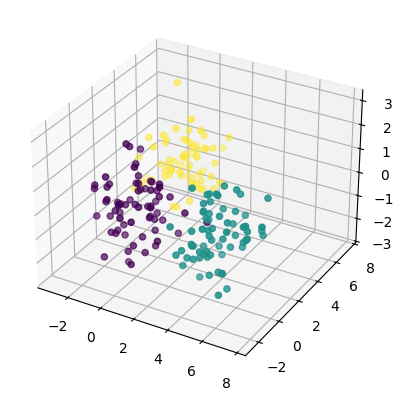

In [ ]:
# Example of a 3d plot using matplotlib
from sklearn.datasets import make_blobs

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

example_x, example_labels = make_blobs(200, 3, centers=[[0.0, 0.0, 0.0], [5.0, 0.0, 0.0], [0.0, 5.0, 0.0]])

ax.scatter(example_x[:,0], example_x[:,1], example_x[:,2], c=example_labels)
plt.show()

Write your short comment on the clustering results in this markdown box.

- Most of the data points are clustered together similarly on both plots. However, there are some outliers that K-means is unable to cluster.

### 1.2 What models/architectures have you chosen to implement [5 marks]

Now we will turn to applying classification models to this dataset, your task now is to choose 4 appropriate models or techniques and train them on the OrganA-MNIST dataset. These should have some distinct difference between them, for example a neural network with different number of layers is acceptable but having the same number layers with different sizes is not. This is not limited to neural networks but you should have at least one neural network model. Otherwise, you may use decision trees and/or logistic regression etc.

In the following block, write a short (max 400 words) **description and justification** of the architectures that you have chosen to implement. You should also think about any optimisers and error or loss functions that you will be using and why they might be suitable. We are looking for you to assess why the architectures are appropriate for the task at hand. Marks will be awared for clear and well reasoned justifications.

*Write your answer in this markdown cell*

### **Model Architectures Description and Justification**

#### 1. Convolutional Neural Network (CNN)

**Overview:**
- **Layers:**
  - **Conv1:** 1 -> 32 channels, 3x3 kernel, ReLU, MaxPool -> (32, 14, 14)
  - **Conv2:** 32 -> 64 channels, 3x3 kernel, ReLU, MaxPool -> (64, 7, 7)
  - **Conv3:** 64 -> 128 channels, 3x3 kernel, ReLU -> (128, 7, 7)
- **Dropout:** 25% after pooling layers
- **Fully Connected:** 128x7x7 -> 256 -> 64 -> 11 classes

**Justification:**
- The use of multiple convolutional layers allows the model to learn increasingly abstract features, from edges and textures in early layers to more complex patterns in deeper layers.
- Max pooling reduces computational complexity and controls overfitting by summarizing feature regions.
- Dropout layers mitigate overfitting.
- The fully connected layers at the end integrate the extracted features to perform classification

#### 2. Fully-Connected Neural Network (NeuralNetwork)

**Overview:**
- **Layers:**
  - **Flatten:** 28x28 -> 784
  - **FC1:** 784 -> 512
  - **FC2:** 512 -> 512
  - **FC3:** 512 -> 256
  - **FC4:** 256 -> 64
  - **FC5:** 64 -> 11 classes
- **Activations:** ReLU between all layers

**Justification:**
This Neural Network architecture transforms input data through multiple hidden layers, capturing complex non-linear relationships. Starting with a high-dimensional representation allows the network to capture a wide range of features, while subsequent layers condense and abstract these features to essential components necessary for classification.

#### 3. Logistic Regression

**Hyperparameters Tuned:** Regularization strength (C), penalty type and the `saga` solver..

**Justification:**
Logistic Regression provides a simple and interpretable baseline. Regularization helps prevent overfitting, and hyperparameter tuning via GridSearchCV ensures optimal performance. It’s effective for linear separable data and serves as a benchmark against more complex models.

#### 4. Decision Tree Classifier

**Hyperparameters Tuned:** `max_depth`, `min_samples_split`, `min_samples_leaf`.

**Justification:**
Decision Trees capture non-linear relationships and interactions between features without extensive preprocessing. Hyperparameter tuning controls model complexity, balancing bias and variance to enhance generalization.


### **Additional Features for Pytorch's Models**
#### A. Early Stopping Mechanism

**Overview:**
Monitors training loss if no improvement is seen over a set number of epochs (`patience`).

**Justification:**
Prevents overfitting by stopping training when performance is satisfied, ensuring the model maintains generalization and reducing unnecessary computation.

#### B. Model Wrapper for Hyperparameter Tuning

**Overview:**
Functionize model setup, training, and prediction. Handles data preparation, device management, and integrates early stopping.

**Justification:**
Create a pipeline experimentation and hyperparameter tuning by providing a unified interface for different models, enhancing modularity and reusability.


### 1.3 Implementation and training of your models. [10 marks]

a) Now implement the models that you have introduced above, train them and optimise any hyper-parameters using the validation set. You may wish to store any training results for the next sub-question.

**1.1** Initialize PyTorch Models

**Model 1:** Convolutional Neural Network Model

**Model 2:** Fully-Connected Neural Network Model

In [65]:
# Program your models here. You can use as many cells as necessary but aim to be concise.
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Initiate Convolutional Neural Network Model
class CNN(nn.Module):
    def __init__(self, num_classes=11, num_nodes=None, dropout=0.25):
        super(CNN, self).__init__()
        # Layer 1: 1 input channel, 8 output channels, 3x3 kernel, stride 1, padding 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1) # Output shape: (32, 28, 28) --> Pooling (32, 14, 14)
        # Layer 2: 32 input channel, 64 output channels, 3x3 kernel, stride 1, padding 1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Output shape: (64, 14, 14) --> Pooling (64, 7, 7)
        # Layer 3: 64 input channel, 128 output channels, 3x3 kernel, stride 1, padding 1
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # Output shape: (128, 7, 7)
        # Max pooling layer: 2x2 window, stride 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Dropout layer: 0.25 dropout probability
        self.dropout = nn.Dropout(dropout)
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = F.relu(self.conv3(x))
        x = x.flatten(1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initiate Fully-connected Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, num_classes=11, num_nodes=512, dropout=None):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, num_nodes)
        self.fc2 = nn.Linear(num_nodes, num_nodes)
        self.fc3 = nn.Linear(num_nodes, num_nodes // 2)
        self.fc4 = nn.Linear(num_nodes // 2, num_nodes // 8)
        self.fc5 = nn.Linear(num_nodes // 8, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

**1.2** Initialize Early Stopping & Model Wrapper

In [71]:
# Initiate Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_model_state = None
        self.best_model_loss = float('inf')

    def __call__(self, training_loss, model):
        if training_loss < self.best_model_loss - self.min_delta:
            self.best_model_loss = training_loss
            self.counter = 0 # Reset counter since there's an improvement
        else:
            self.counter +=1
            if self.counter >= self.patience:
                print("Early Stopping Activated")
                self.best_model_state = model.state_dict()
                return True

# Initiate Model Wrapper for hyperparameter tuning
class ModelWrapper:
    def __init__(self, model, num_classes=11, epochs=30, learning_rate=0.001, dropout=0.25, num_nodes=512):
        self.num_classes = num_classes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.dropout = dropout
        self.num_classes = num_classes
        # Check if CUDA is available
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model(num_classes=self.num_classes, dropout=self.dropout, num_nodes=num_nodes).to(self.device)

    def prepare_dataloader(self, dataset, labels=None):
        # If there are no labels, set them to array of zeros
        labels = np.array([0] * dataset.shape[0]).reshape(dataset.shape[0],1) if labels is None else labels
        transformers = transforms.Compose([transforms.Normalize((0.5), (0.5))])
        return TensorDataset(transformers(torch.tensor(dataset, dtype=torch.float32)), torch.tensor(labels))

    def fit(self, X_train, y_train, learning_rate=0.001, epochs=30):
        # Data Loader
        train_loader = DataLoader(self.prepare_dataloader(X_train, y_train), batch_size=32, shuffle=True)

        # Initiate Model, Optimizer and Early Stopping
        loss_function = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        early_stopping = EarlyStopping(patience=5, min_delta=0)

        print(f'Starting Training on {self.device}')

        for epoch in range(epochs):
            # Training Loop
            self.model.train()
            training_loss = 0.0
            for inputs, labels in train_loader:
                # Add channel dimension
                inputs = inputs.unsqueeze(1).to(self.device)
                # Reshape labels to a 1D tensor
                labels = labels.reshape(-1).to(self.device)
                # reset the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = self.model(inputs)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                training_loss += loss.item()
            training_loss /= len(train_loader)

            # Print status every 3 epochs
            if (epoch+1) % 3 == 0:
                print(f'Epoch: {epoch + 1} | Training Loss: {training_loss:.4f}')

            # Early Stopping
            if early_stopping(training_loss, self.model):
                print(f'Early stopping at epoch {epoch + 1}')
                break

        print('Finished Training\n')

        return self

    def predict(self, X_test):
        self.model.eval()
        predictions = []
        test_loader = DataLoader(self.prepare_dataloader(X_test), batch_size=32, shuffle=False)
        with torch.no_grad():
            for data, target in test_loader:
                data = data.unsqueeze(1).to(self.device)
                outputs = self.model(data)
                X, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.cpu().numpy())
        return predictions

**1.3** Hyperparameter Tuning for CNN **(Model 1)**

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
dropouts = [0.1, 0.15, 0.2, 0.25]

cnn_result = {}
best_score = 0
for learning_rate in learning_rates:
    for dropout in dropouts:
        print(f"At Learning Rate: {learning_rate} & Dropout: {dropout}")
        model = ModelWrapper(model=CNN, num_classes=11, learning_rate=learning_rate, dropout=dropout)
        model.fit(dataset['train_images'], dataset['train_labels'], epochs=50)
        predictions = model.predict(dataset['val_images'])
        accuracy = accuracy_score(dataset['val_labels'], predictions)
        if accuracy > best_score:
            best_score = accuracy
            torch.save(model.model.state_dict(), f'best_cnn_model.pth')
            print("Model saved\n")
        cnn_result[(learning_rate, dropout)] = accuracy

At Learning Rate: 0.0001 & Dropout: 0.1
Starting Training on cuda
Epoch: 3 | Training Loss: 0.1085
Epoch: 6 | Training Loss: 0.0586
Epoch: 9 | Training Loss: 0.0512
Epoch: 12 | Training Loss: 0.0725
Epoch: 15 | Training Loss: 0.0356
Epoch: 18 | Training Loss: 0.0737
Epoch: 21 | Training Loss: 0.0566
Early Stopping Activated
Early stopping at epoch 22
Finished Training

Model saved

At Learning Rate: 0.0001 & Dropout: 0.15
Starting Training on cuda
Epoch: 3 | Training Loss: 0.1603
Epoch: 6 | Training Loss: 0.0733
Epoch: 9 | Training Loss: 0.0420
Epoch: 12 | Training Loss: 0.0599
Early Stopping Activated
Early stopping at epoch 14
Finished Training

At Learning Rate: 0.0001 & Dropout: 0.2
Starting Training on cuda
Epoch: 3 | Training Loss: 0.1690
Epoch: 6 | Training Loss: 0.0849
Epoch: 9 | Training Loss: 0.0692
Epoch: 12 | Training Loss: 0.0589
Epoch: 15 | Training Loss: 0.0759
Epoch: 18 | Training Loss: 0.0662
Epoch: 21 | Training Loss: 0.0802
Epoch: 24 | Training Loss: 0.0354
Epoch: 27

In [ ]:
print(f'Best parameters for CNN: learning rate = {max(cnn_result, key=cnn_result.get)[0]}, dropout = {max(cnn_result, key=cnn_result.get)[1]}')
print(f'Best Score for CNN: {best_score}')

Best parameters for CNN: learning rate = 0.0001, dropout = 0.1
Best Score for CNN: 0.9782776151594516


**1.4** Hyperparameter Tuning for Neural Network **(Model 2)**

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_nodes = [128, 256, 512, 1024]

nn_result = {}
best_score = 0
for learning_rate in learning_rates:
    for n_nodes in num_nodes:
        print(f"At Learning Rate: {learning_rate} & Number of Nodes: {n_nodes}")
        model = ModelWrapper(model=NeuralNetwork, num_classes=11, learning_rate=learning_rate, num_nodes=n_nodes)
        model.fit(X_train=dataset['train_images'], y_train=dataset['train_labels'], epochs=50)
        predictions = model.predict(dataset['val_images'])
        accuracy = accuracy_score(dataset['val_labels'], predictions)
        if accuracy > best_score:
            best_score = accuracy
            torch.save(model.model.state_dict(), f'best_nn_model.pth')
            print("Model saved")
        nn_result[(learning_rate, n_nodes)] = accuracy

At Learning Rate: 0.0001 & Number of Nodes: 128
Starting Training on cuda
Epoch: 3 | Training Loss: 1.6535
Epoch: 6 | Training Loss: 1.1148
Epoch: 9 | Training Loss: 0.7706
Epoch: 12 | Training Loss: 0.5691
Epoch: 15 | Training Loss: 0.4989
Epoch: 18 | Training Loss: 0.4474
Epoch: 21 | Training Loss: 0.4169
Epoch: 24 | Training Loss: 0.3896
Epoch: 27 | Training Loss: 0.3853
Epoch: 30 | Training Loss: 0.3497
Epoch: 33 | Training Loss: 0.4116
Epoch: 36 | Training Loss: 0.3390
Epoch: 39 | Training Loss: 0.3082
Epoch: 42 | Training Loss: 0.2929
Epoch: 45 | Training Loss: 0.2914
Epoch: 48 | Training Loss: 0.2956
Finished Training

Model saved
At Learning Rate: 0.0001 & Number of Nodes: 256
Starting Training on cuda
Epoch: 3 | Training Loss: 0.8722
Epoch: 6 | Training Loss: 0.5552
Epoch: 9 | Training Loss: 0.4116
Epoch: 12 | Training Loss: 0.3253
Epoch: 15 | Training Loss: 0.2728
Epoch: 18 | Training Loss: 0.2520
Epoch: 21 | Training Loss: 0.2264
Epoch: 24 | Training Loss: 0.1859
Epoch: 27 |

In [ ]:
print(f'Best parameters for Neural Network: learning rate = {max(nn_result, key=nn_result.get)[0]}, number of nodes = {max(nn_result, key=nn_result.get)[1]}')
print(f'Best Score for Neural Network: {best_score}')

Best parameters for Neural Network: learning rate = 0.0001, number of nodes = 512
Best Score for Neural Network: 0.9089508550300416


**2.1** Initialize Sci-kit Learn models and Hyperparameters tuning by Randomized Search

**Model 3:** Logistic Regression

**Model 4:** Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'LogisticRegression': LogisticRegression(max_iter=1500, random_state=101),
    'DecisionTree': DecisionTreeClassifier(random_state=101)
}

param_grids = {
    'LogisticRegression': {
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['saga']
    },
    'DecisionTree': {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}


grids = {}
best_model = {}
# Data Preprocessing
X_train = dataset['train_images'].reshape(dataset['train_images'].shape[0], 28*28) / 255  # Convert to 1D & Normalization
X_val = dataset['val_images'].reshape(dataset['val_images'].shape[0], 28*28) / 255
pca = PCA().fit(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) # Calculate the cumulative explained variance
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1 # Choose the number of components based on the explained variance threshold
pca = PCA(n_components=n_components)

X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
y_train = dataset['train_labels'].reshape(-1)
y_val = dataset['val_labels'].reshape(-1)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

# Initialize PredefinedSplit to allow GridSearchCV to use Validation Set for Hyperparameter Tuning
test_fold = np.concatenate([
    np.full(len(X_train), -1, dtype=int),
    np.full(len(X_val), 0, dtype=int)
])
ps = PredefinedSplit(test_fold)

for model_name, model in models.items():
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=ps, scoring='accuracy', n_jobs=-1, refit=False)
    grids[model_name].fit(X, y)
    best_params = grids[model_name].best_params_

    print(f'Best Parameters for {model_name}: {best_params}')

Best Parameters for LogisticRegression: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for DecisionTree: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


**2.2** Evaluate Sci-kit Learn Models

In [ ]:
import joblib

logistic_regression_model = LogisticRegression(max_iter=1500, random_state=101, **grids['LogisticRegression'].best_params_)
logistic_regression_model.fit(X_train, y_train)
joblib.dump(logistic_regression_model, 'LogisticRegression.pkl')
predictions = logistic_regression_model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f'Best Score for Logistic Regression: {accuracy}')

tree_model = DecisionTreeClassifier(random_state=101, **grids['DecisionTree'].best_params_)
tree_model.fit(X_train, y_train)
joblib.dump(tree_model, 'DecisionTree.pkl')
predictions = tree_model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f'Best Score for Decision Tree: {accuracy}')

Best Score for Logistic Regression: 0.8784470805731012
Best Score for Decision Tree: 0.7639808966260977


**3.** Summary

All the models are evaluated by predicting the **Validation Images** and calculate the accuracy score as below:
- Convolutional Neural Networt: **97.83%** (The Best)
- Fully-Connected Neural Network: **90.90%**
- Logistic Regression: **85.64%**
- Decision Tree: **74.55%**

b) In the following block, provide a description of how you have selected or optimised any hyper-parameters.

*Write your answer in this markdown cell*

#### 1. **Convolutional Neural Network (CNN)**

**Hyperparameters Tuned:**
- **Learning Rate:** `[0.0001, 0.001, 0.01, 0.1]`
- **Dropout Rate:** `[0.1, 0.15, 0.2, 0.25]`

**Strategy:** 
- **Grid Searching:** iterate over all combinations of the specified learning rates and dropout rates.
- **Early Stopping:** employ Early Stopping mechanism to monitor training loss if no improvement is seen over a set number of epochs (`patience`).

**Justification:**
Exploring a range of learning rates ensures that the optimizer can effectively navigate the loss landscape, while varying dropout rates helps in balancing model complexity and regularization. This grid search approach allows for identifying the optimal trade-off between learning speed and overfitting prevention.

#### 2. **Fully-Connected Neural Network (NeuralNetwork)**

**Hyperparameters Tuned:**
- **Learning Rate:** `[0.0001, 0.001, 0.01, 0.1]`
- **Number of Nodes:** `[128, 256, 512, 1024]`

**Strategy:** 
- **Grid Searching:** iterate over all combinations of the specified learning rates and a number of nodes.
- **Early Stopping:** employ Early Stopping mechanism to monitor training loss if no improvement is seen over a set number of epochs (`patience`).

**Justification:**
Adjusting the number of nodes in each layer allows the network to capture varying levels of feature complexity. With different learning rates, this tuning ensures that the network has sufficient capacity without overfitting, and the optimization process is both stable and efficient.

#### 3. **Logistic Regression**

**Hyperparameters Tuned:**
- **Regularization Strength (C):** `[1e-4, 1e-3, 1e-2, 1e-1, 1, 10]`
- **Penalty:** `['l1', 'l2']`
- **Solver:** `['saga']`

**Strategy:** using **GridSearchCV**  library from Sci-Kit Learn to perform a search over the specified hyperparameter grid.
**Cross-Validation:** using `PredefinedSplit` to allow the **GridSearchCV** library to score the training based on the Validation Images

**Justification:**
Logistic Regression benefits from regularization to prevent overfitting, especially in high-dimensional spaces. Exploring different values of `C` and penalty types (`l1` for sparsity and `l2` for weight decay) ensures that the model maintains a balance between bias and variance. The `saga` solver was chosen for its ability to handle both penalty types efficiently.

#### 4. **Decision Tree Classifier**

**Hyperparameters Tuned:**
- **Maximum Depth (`max_depth`):** `[10, 20, 30, None]`
- **Minimum Samples to Split (`min_samples_split`):** `[2, 5, 10]`
- **Minimum Samples per Leaf (`min_samples_leaf`):** `[1, 2, 4]`

**Strategy:** using **GridSearchCV**  library from Sci-Kit Learn to perform a search over the specified hyperparameter grid.
**Cross-Validation:** using `PredefinedSplit` to allow the **GridSearchCV** library to score the training based on the Validation Images

**Justification:**
Decision Trees are prone to overfitting, especially with deep trees. Tuning `max_depth` controls the tree's complexity, while `min_samples_split` and `min_samples_leaf` parameters regulate the minimum data points required to create splits and leaves, respectively. This ensures that the tree captures meaningful patterns without memorizing the training data.

### 1.4 Classification results based on the test data [8 marks]

a) Create **two bar charts** that provides a comparison between your 4 models; the first should compare the classification accuracy on the training dataset, while the second should compare it on the test set.


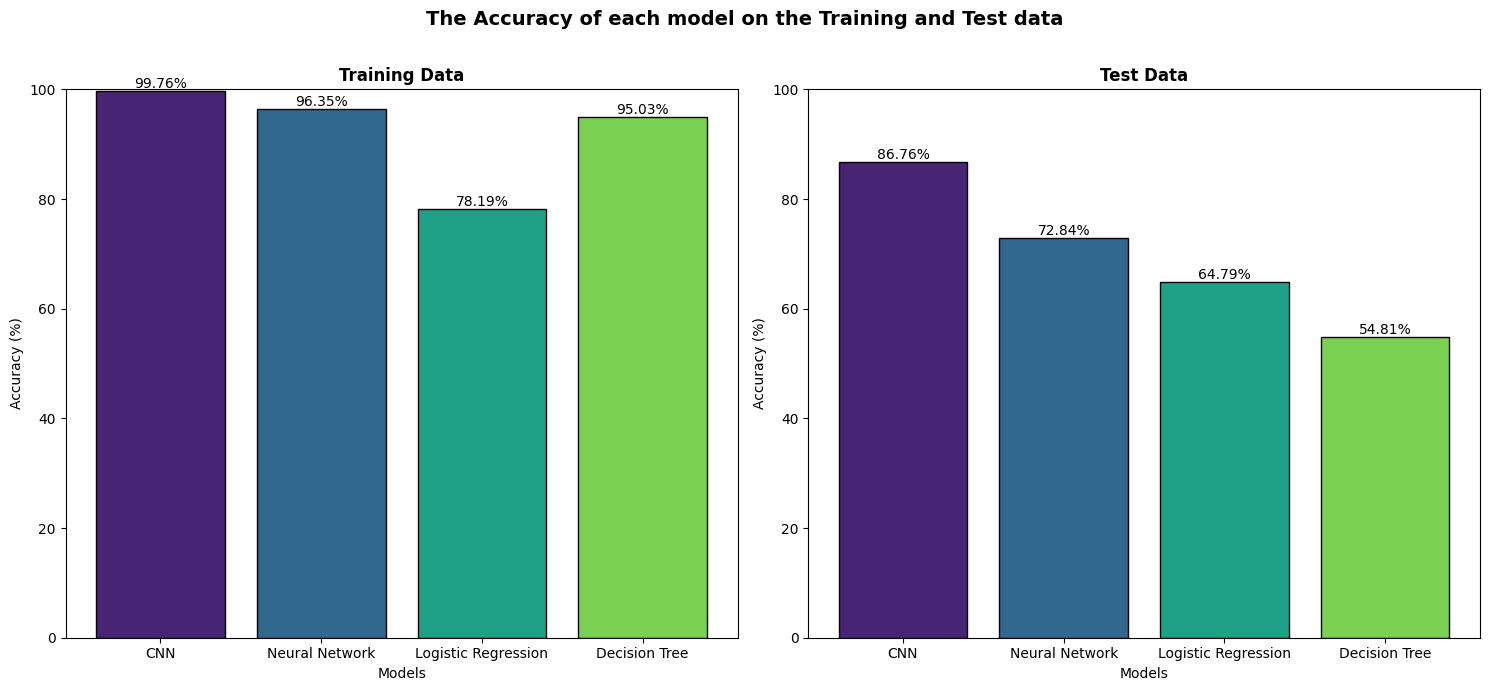

In [78]:
# Program your plots here.
import joblib
# Load all models
cnn_model = CNN()
state_dict = torch.load('best_cnn_model.pth', map_location=torch.device('cpu'), weights_only=True)
cnn_model.load_state_dict(state_dict)

nn_model = NeuralNetwork()
state_dict = torch.load('best_nn_model.pth', map_location=torch.device('cpu'), weights_only=True)
nn_model.load_state_dict(state_dict)

logistic_regression_model = joblib.load('LogisticRegression.pkl')

tree_model = joblib.load('DecisionTree.pkl')

X_train = dataset['train_images'].reshape(-1, 28*28) / 255  # Convert to 1D & Normalization
pca = PCA().fit(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) # Calculate the cumulative explained variance
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1 # Choose the number of components based on the explained variance threshold
pca = PCA(n_components=n_components).fit(X_train)

# Initiate model instances dictionary
all_models = {
    'CNN': cnn_model,
    'Neural Network': nn_model,
    'Logistic Regression': logistic_regression_model,
    'Decision Tree': tree_model
}

# Function for predicting PyTorch's model
def torch_predict(model_name: str, model, X: np.ndarray) -> list:
    """Predict PyTorch's model."""
    model_instance = CNN if model_name == 'CNN' else NeuralNetwork
    model.eval()
    loader = DataLoader(ModelWrapper(model=model_instance).prepare_dataloader(dataset=X), batch_size=32, shuffle=False)
    predictions = []
    with torch.no_grad():
        for data, target in loader:
            data = data.unsqueeze(1)
            outputs = model(data)
            X, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())
    return predictions

# Function for calculating accuracy for all models
def calculate_accuracy(all_models: dict, X: np.ndarray, y: np.ndarray) -> tuple:
    """Predict and calculate accuracy for all models."""
    accuracy_dict = {}
    predictions_dict = {}
    for model_name, model in all_models.items():
        if model_name in ['CNN', 'Neural Network']:
            predictions = torch_predict(model_name, model, X)
        else:
            X_preprocessed = X.reshape(-1, 28*28) / 255
            X_preprocessed = pca.transform(X_preprocessed)
            predictions = model.predict(X_preprocessed)

        predictions_dict[model_name] = predictions
        accuracy_dict[model_name] = round(accuracy_score(y, predictions) * 100, 2)
    return accuracy_dict, predictions_dict

# Prepare data for plotting
train_accuracy_dict, train_predictions_dict = calculate_accuracy(all_models, dataset['train_images'], dataset['train_labels'])
test_accuracy_dict, test_predictions_dict = calculate_accuracy(all_models, dataset['test_images'], dataset['test_labels'])
all_accuracy_list = [train_accuracy_dict, test_accuracy_dict]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
for i, accuracy_dict in enumerate(all_accuracy_list):
    bars = axes[i].bar(list(accuracy_dict.keys()), list(accuracy_dict.values()),
                color=plt.cm.viridis(np.linspace(0.1, 0.8, 4)),
                edgecolor='black')
    axes[i].set_title('Training Data' if i == 0 else 'Test Data', fontweight='bold', fontsize=12)
    axes[i].set_ylim(0, 100)
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel('Accuracy (%)')
    # Annotating the bars
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.2f}%',
                 ha='center',
                 va='bottom',
                 fontsize=10)

# Add a main title for the entire figure
fig.suptitle('The Accuracy of each model on the Training and Test data\n', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

b) Create and plot a **confusion matrix** for each of your models (4 plots in total) to compare their classification performance.

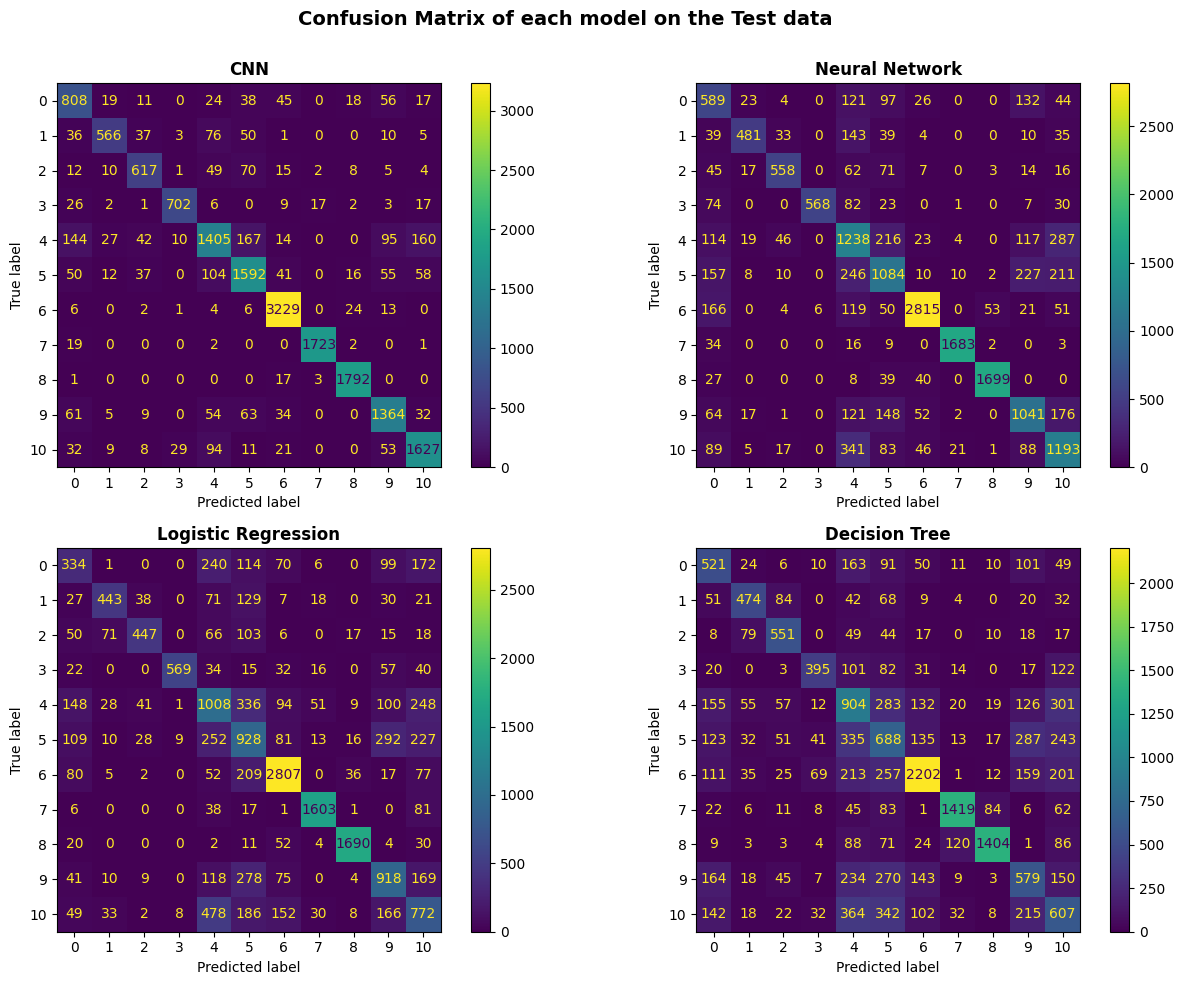

In [79]:
# Program your plots here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Configurations
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
axes = axes.flatten()

for i, model_name in enumerate(all_models.keys()):
    cm = confusion_matrix(dataset['test_labels'], test_predictions_dict[model_name])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(11)))
    cm_display.plot(ax=axes[i])
    axes[i].set_title(model_name, fontweight='bold', fontsize=12)

# Add a main title for the entire figure
fig.suptitle('Confusion Matrix of each model on the Test data\n', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

c) Now provide a **short discussion and analysis** of your results and any conclusions that you can make from the data.

*Write your answer in this markdown cell*

- **Deep Learning Models:** CNN and Neural Network models outperform traditional models in accuracy and classes predictions, with CNN leading due to its specialized architecture for spatial data.
- **Traditional Models Limitations:** Decision Trees and Logistic Regression underperform, struggling with complex classifications and higher misclassification rates.
- **Analysis**
    - **Weakness of All Models**: High number of misclassification in classes 4, which indicate that they get confused with classes 0, 5 and 10.
    - **Data Imbalance** Since all the models predict class 6 correct the most possibly caused by  its predominance in the dataset.


## 2. Denoising Autoencoder [17 marks]

### The CIFAR-10 dataset
In this assignment, we will work on the CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto. This dataset consists of 60,000  colour images in 10 classes, with 6,000 images per class. Each sample is a 3-channel colour images of 32x32 pixels in size. There are 50,000 training images and 10,000 test images.

### 2.1: Data loading and manipulation [3 marks]

**2.1a** Using the PyTorch Torchvision datasets, download both the training and test data of the CIFAR-10 dataset. If you find it more convenient, you may download them from a different source the Torchvision. For an example, please see the lab on Convolutional Neural Networks.

In [3]:
# Code your solution here
from torchvision import datasets

transform = transforms.Compose(
    [transforms.ToTensor()]
    )

batch_size = 32

trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Training set size:', len(trainset))
print('Test set size:',len(testset))

Files already downloaded and verified
Files already downloaded and verified
Training set size: 50000
Test set size: 10000


**2.1b** Add random noise to all training and test data to generate noisy dataset, e.g., by torch.randn(), with a scaling factor scale, e.g., original image + scale * torch.randn(), and normalise/standardise the pixel values to the original range, e.g., using torch.clip(). You may choose any scale value between 0.2 and 0.5.

There are 2 ways to apply these random transformations using the latest version of Torchvision. Either are acceptable as long as the correct noise is applied.
- In the newer verions, PyTorch has introduced v2 transformations which includes directly a `GaussianNoise([mean, sigma, clip])` transformation (please see [here](https://pytorch.org/vision/master/transforms.html#color) for more details).
- If you are not using the vv2 transformations then random transformation can be applied using a `Lambda` [transform](https://pytorch.org/vision/stable/transforms.html) when composing the load data transform, which looks a little like this:  
`transforms.Lambda(lambda x: x + ..... )`

Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using torch.manual_seed(). This seed needs to be used for all remaining code if there is randomness, for reproducibility.

You may want to create separate dataloaders for the noisy and clear images but make sure they are **not shuffling the data** so that correct pair of images are being given as input and desired output.

In [4]:
# Code your solution here
torch.manual_seed(1830703) # My UCARD is 001830703, but the two zeros need to be removed
scale = 0.2
noise_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + scale * torch.randn_like(x)),
    transforms.Lambda(lambda x: torch.clip(x, 0, 1))
])

noised_trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=noise_transform)
noised_trainloader = torch.utils.data.DataLoader(noised_trainset, batch_size=batch_size, shuffle=False)

noised_testloader = datasets.CIFAR10(root='./data', train=False, download=True, transform=noise_transform)
noised_testloader = torch.utils.data.DataLoader(noised_testloader, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


**2.1c** Show 10 pairs of original and noisy images.

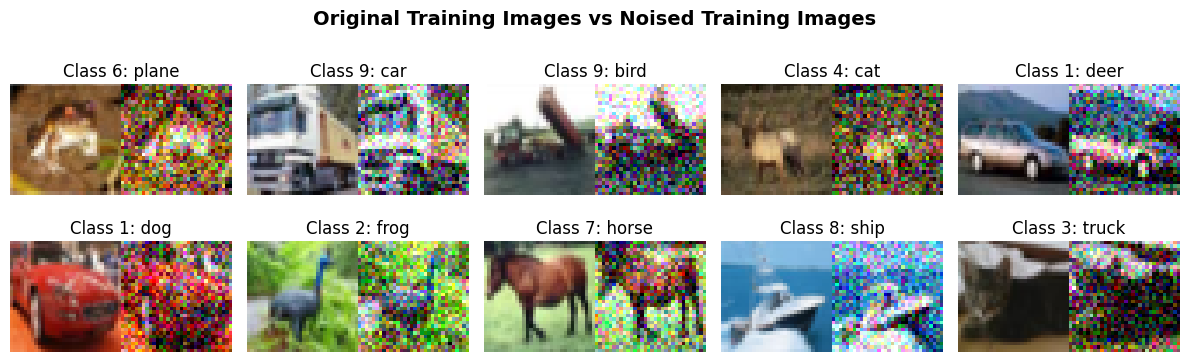

In [7]:
# Code your solution here
images, labels = next(iter(trainloader))
noised_images, labels = next(iter(noised_trainloader))
fig, axes = plt.subplots(2, 5, figsize=(12, 4))
axes = axes.flatten()

def imshow(i, img):
    npimg = img.numpy()
    axes[i].imshow(np.transpose(npimg, (1, 2, 0))) # permute dimensions to numpy format for display
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f'Class {labels[i]}: {classes[i]}')

for i in range(10):
    concatenated_image = torch.cat([images[i], noised_images[i]], dim=2)
    imshow(i, concatenated_image)

# Add a main title for the entire figure
fig.suptitle('Original Training Images vs Noised Training Images', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


### 2.2 Applying a Denoising Autoencoder to the modified CIFAR10 [10 marks]

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).
Read about denoising autoencoders at [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

**2.2a** Modify the autoencoder architecture so that it takes colour images as input (i.e., 3 input channels).

In [52]:
# Code your solution here
class ConvAutoencoder(nn.Module):
    def __init__(self, n_nodes=16):
        super(ConvAutoencoder, self).__init__()
        # Encoder part
        self.encoder = nn.Sequential(
            nn.Conv2d(3, n_nodes, kernel_size=3, stride=1, padding=1),  # Output: (16, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (16, 16, 16)
            nn.Conv2d(n_nodes, n_nodes * 2, kernel_size=3, stride=1, padding=1),  # Output: (32, 16, 16)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (32, 8, 8)
            nn.Conv2d(n_nodes * 2, n_nodes * 4, kernel_size=3, stride=1, padding=1),  # Output: (64, 8, 8)
            nn.ReLU()
        )

        # Decoder part
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(n_nodes * 4, n_nodes * 2, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (32, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(n_nodes * 2, n_nodes, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (16, 32, 32)
            nn.ReLU(),
            nn.ConvTranspose2d(n_nodes, 3, kernel_size=3, stride=1, padding=1),  # Output: (3, 32, 32)
            nn.Sigmoid()  # Scale the output to [0, 1]
        )

    def forward(self, x):
        z = self.encoder(x)
        x = self.decoder(z)
        return x

**2.2b** Training: feed the noisy training images as input to the autoencoder defined above; use a loss function that computes the reconstruction error between the output of the autoencoder and the respective original images.



In [53]:
# Code your solution here
torch.manual_seed(1830703)  # For CPU and MPS
torch.cuda.manual_seed_all(1830703)  # For CUDA

def add_noise(images, scale=0.2):
    torch.manual_seed(1830703)
    return torch.clip(images + scale * torch.randn_like(images), 0, 1)

def train_autoencoder(model=ConvAutoencoder, train_loader=trainloader, num_epochs=15, learning_rate=0.001, n_nodes=16):
    device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))
    encoder_model = model(n_nodes=n_nodes).to(device)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(encoder_model.parameters(), lr=learning_rate)
    print(f'Start Training on {device}')

    for epoch in range(num_epochs):
        encoder_model.train()
        for clean_images, _ in train_loader:
            clean_images = clean_images.to(device)
            noised_images = add_noise(clean_images)
            # reset the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            recon = encoder_model(noised_images)
            loss = loss_function(recon, clean_images)
            loss.backward()
            optimizer.step()
        # Print statistics every 3 epochs
        if (epoch+1) % 3 == 0:
            print(f'Epoch: {epoch + 1} | Training Loss: {loss.item():.4f}')

    return encoder_model

trained_model = train_autoencoder(model=ConvAutoencoder, train_loader=noised_trainloader, num_epochs=30, learning_rate=0.0001, n_nodes=16)
# Save Model
torch.save(trained_model.state_dict(), f'best_autoencoder_model.pth')
print("Model saved")

Start Training on mps
Epoch: 3 | Training Loss: 0.0378
Epoch: 6 | Training Loss: 0.0363
Epoch: 9 | Training Loss: 0.0356
Epoch: 12 | Training Loss: 0.0350
Epoch: 15 | Training Loss: 0.0346
Epoch: 18 | Training Loss: 0.0342
Epoch: 21 | Training Loss: 0.0338
Epoch: 24 | Training Loss: 0.0334
Epoch: 27 | Training Loss: 0.0331
Epoch: 30 | Training Loss: 0.0328
Model saved


**2.2c** Testing: evaluate the autoencoder trained in 2.2b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the worst denoised 20 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (40 images to show in total).

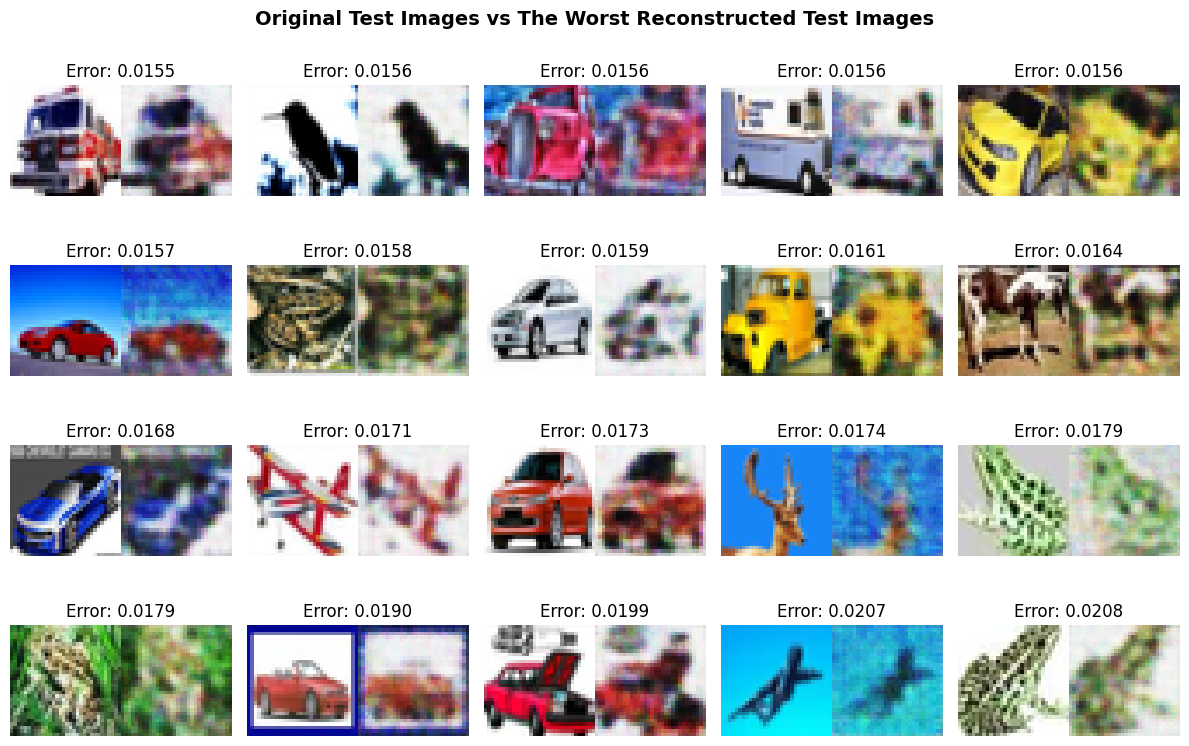

In [54]:
# Code your solution here
torch.manual_seed(1830703)  # For CPU and MPS
torch.cuda.manual_seed_all(1830703)  # For CUDA

def predict_autoencoder(model, testloader=testloader):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))
    loss_function = nn.MSELoss(reduction='none')
    errors = []
    all_clean_images = []
    all_recon_images = []
    with torch.no_grad():
        for clean_images, _ in testloader:
            clean_images = clean_images.to(device)
            noised_images = add_noise(clean_images).to(device)
            recon = model(noised_images)
            batch_errors = loss_function(recon, clean_images).mean(dim=[1, 2, 3])

            errors.extend(batch_errors.cpu().numpy())
            all_clean_images.extend(clean_images.cpu().numpy())
            all_recon_images.extend(recon.cpu().numpy())

    return np.array(errors), np.array(all_clean_images), np.array(all_recon_images)

errors, all_clean_images, all_recon_images = predict_autoencoder(model=trained_model)
# Find indices of the top 20 largest errors
worst_indices = np.argsort(errors)[-20:]
# Find the worst reconstructed images
worst_clean_images = torch.from_numpy(all_clean_images[worst_indices])
worst_recon_images = torch.from_numpy(all_recon_images[worst_indices])

# Plotting
fig, axes = plt.subplots(4, 5, figsize=(12, 8))
axes = axes.flatten()

def imshow(i, indice, img):
    npimg = img.numpy()
    axes[i].imshow(np.transpose(npimg, (1, 2, 0))) # permute dimensions to numpy format for display
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f'Error: {errors[indice]:.4f}')

for i in range(20):
    indice = worst_indices[i]
    concatenated_image = torch.cat([worst_clean_images[i], worst_recon_images[i]], dim=2)
    imshow(i, indice, concatenated_image)

# Add a main title for the entire figure
fig.suptitle('Original Test Images vs The Worst Reconstructed Test Images', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

**2.2d** Choose at least **two** hyperparameters (e.g learning rate) to vary. Study at least **three** different choices for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. **Plot** the reconstruction error with respect to each of these hyper-parameters.

In [59]:
# Code your solution here
from matplotlib.patheffects import withStroke

torch.manual_seed(1830703)  # For CPU and MPS
torch.cuda.manual_seed_all(1830703)  # For CUDA

# Define Hyperparameters
learning_rates = [0.0001, 0.001, 0.01]
n_nodes = [16, 24, 32]

recon_errors_lr = []
recon_errors_nn = []
 # Fixed number of nodes
fixed_n_nodes = 16 
fixed_learning_rate = 0.001

print(f"Varying Learning Rate while keeping Number of Nodes fixed at {fixed_n_nodes}:")
for lr in learning_rates:
    print(f"Training with Learning Rate: {lr}")
    trained_model = train_autoencoder(model=ConvAutoencoder, train_loader=noised_trainloader, num_epochs=18, learning_rate=lr, n_nodes=fixed_n_nodes)
    errors, _, _ = predict_autoencoder(model=trained_model)
    mean_error = errors.mean()
    recon_errors_lr.append(mean_error)
    print(f"Mean Reconstruction Error: {mean_error:.4f}\n")

print("Varying Number of Nodes while keeping Learning Rate fixed at {fixed_learning_rate}:")
for n_node in n_nodes:
    print(f"Training with Number of Nodes: {n_node}")
    trained_model = train_autoencoder(model=ConvAutoencoder, train_loader=noised_trainloader, num_epochs=18, learning_rate=fixed_learning_rate, n_nodes=n_node)
    errors, _, _ = predict_autoencoder(model=trained_model)
    mean_error = errors.mean()
    recon_errors_nn.append(mean_error)
    print(f"Mean Reconstruction Error: {mean_error:.4f}\n")

Varying Learning Rate while keeping Number of Nodes fixed at 16:
Training with Learning Rate: 0.0001
Start Training on mps
Epoch: 3 | Training Loss: 0.0378
Epoch: 6 | Training Loss: 0.0363
Epoch: 9 | Training Loss: 0.0356
Epoch: 12 | Training Loss: 0.0350
Epoch: 15 | Training Loss: 0.0346
Epoch: 18 | Training Loss: 0.0342
Mean Reconstruction Error: 0.0068

Training with Learning Rate: 0.001
Start Training on mps
Epoch: 3 | Training Loss: 0.0343
Epoch: 6 | Training Loss: 0.0322
Epoch: 9 | Training Loss: 0.0307
Epoch: 12 | Training Loss: 0.0292
Epoch: 15 | Training Loss: 0.0282
Epoch: 18 | Training Loss: 0.0276
Mean Reconstruction Error: 0.0104

Training with Learning Rate: 0.01
Start Training on mps
Epoch: 3 | Training Loss: 0.0341
Epoch: 6 | Training Loss: 0.0329
Epoch: 9 | Training Loss: 0.0332
Epoch: 12 | Training Loss: 0.0326
Epoch: 15 | Training Loss: 0.0323
Epoch: 18 | Training Loss: 0.0319
Mean Reconstruction Error: 0.0084

Varying Number of Nodes while keeping Learning Rate fixe

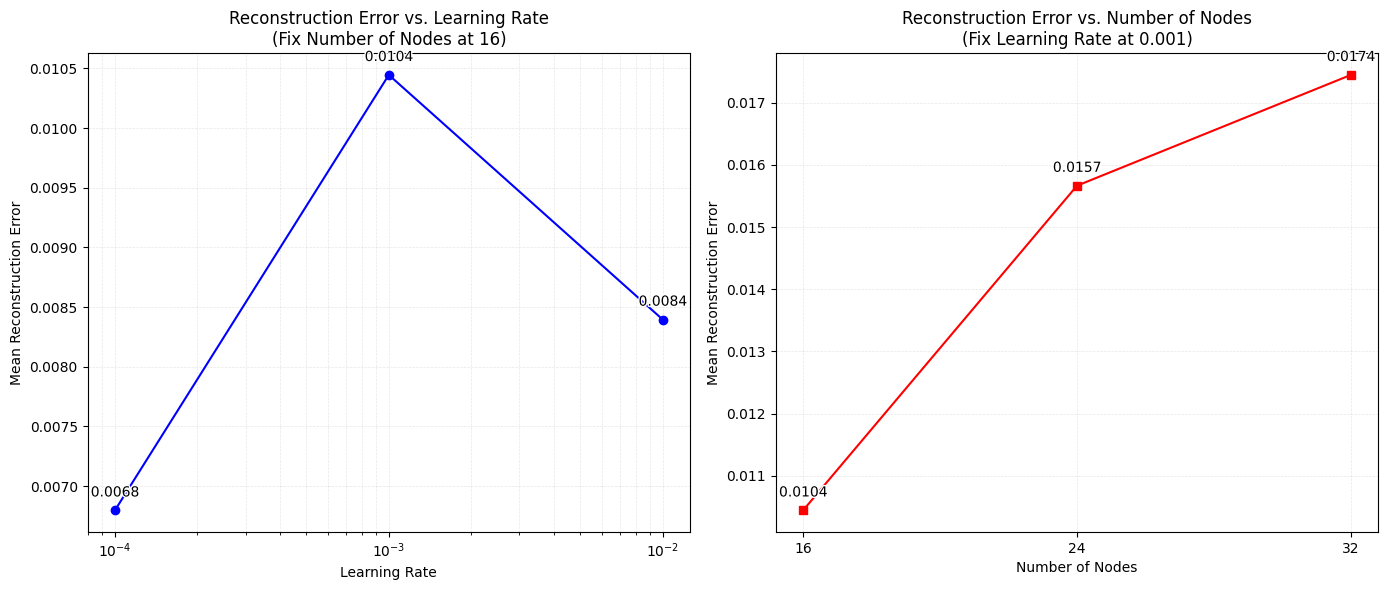

In [88]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Reconstruction Error vs. Learning Rate
axes[0].plot(learning_rates, recon_errors_lr, marker='o', linestyle='-', color='b')
axes[0].set_xscale('log')  # Change axis scale to log
axes[0].set_xlabel("Learning Rate")
axes[0].set_ylabel("Mean Reconstruction Error")
axes[0].set_title("Reconstruction Error vs. Learning Rate\n(Fix Number of Nodes at 16)")
axes[0].grid(True, which="both", ls="--", linewidth=0.5, alpha=0.3)

# Annotate each point
for i, lr in enumerate(learning_rates):
    axes[0].annotate(f"{recon_errors_lr[i]:.4f}", 
                    (learning_rates[i], recon_errors_lr[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    path_effects=[withStroke(linewidth=2, foreground="white")])

# Plot 2: Reconstruction Error vs. Number of Nodes
axes[1].plot(n_nodes, recon_errors_nn, marker='s', linestyle='-', color='r')
axes[1].set_xticks(n_nodes)
axes[1].set_xlabel("Number of Nodes")
axes[1].set_ylabel("Mean Reconstruction Error")
axes[1].set_title("Reconstruction Error vs. Number of Nodes\n(Fix Learning Rate at 0.001)")
axes[1].grid(True, ls="--", linewidth=0.5, alpha=0.3)

# Annotate each point
for i, nn in enumerate(n_nodes):
    axes[1].annotate(f"{recon_errors_nn[i]:.4f}", 
                    (n_nodes[i], recon_errors_nn[i]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    path_effects=[withStroke(linewidth=2, foreground="white")])

plt.tight_layout()
plt.show()

### 2.3 Discussion of results [4 marks]
**2.3a** Describe at least **two** interesting relevant observations from the evaluation results above.

Write your solution in this markdown box

1. **Decreasing Learning Rates did not always improve performance.**  
   When the number of neurons was fixed at 16, varying the learning rate showed inconsistent effects on reconstruction error. Lowering the learning rate from 0.001 to 0.0001 improved the reconstruction error from 0.0104 to 0.0068, indicating that a more gradual learning process facilitated better convergence. However, decreasing the learning rate from 0.01 to 0.001 resulted in an increased error from 0.0084 to 0.0104, demonstrating that reducing the learning rate does not always enhance performance. This fluctuation indicates that the relationship between learning rate and model performance is non-linear.

2. **Increasing the number of neurons at a fixed learning rate did not improve performance.**  
   When the learning rate was fixed at 0.001, adding more neurons actually resulted in higher reconstruction errors. This suggests that a more complex model (with more neurons) does not necessarily lead to better reconstruction under the same learning conditions.